# 데이터 시각화

### 구글 드라이브 연동

In [2]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/'

Mounted at /gdrive
'서울시 코로나19 확진자 현황.csv'   report_2019.txt   tempHelloWorld.xlsx
 owid-covid-data.csv		    report.tsv	      temptest.db.db
 report_2019.gsheet		    temp	      temptest.txt


### 한글 사용

In [1]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


### package import

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터

##### 1.데이터 불러오기

In [4]:
df_origin = pd.read_csv(drive_path + 'concat_df.csv')

In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21480 entries, 0 to 21479
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       21480 non-null  int64 
 1   categories       21480 non-null  object
 2   title            21479 non-null  object
 3   company_names    21475 non-null  object
 4   target_amounts   21480 non-null  int64 
 5   funding_amounts  21480 non-null  int64 
 6   percentages      21480 non-null  int64 
 7   n_supporters     21480 non-null  int64 
 8   likes            21480 non-null  int64 
 9   durations        21480 non-null  object
 10  start            21480 non-null  object
 11  end              21480 non-null  object
 12  time             21480 non-null  int64 
 13  descriptions     21468 non-null  object
 14  result           21480 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 2.5+ MB


##### 2.데이터 처리

###### -프로젝트 기간의 시작과 끝을 분기별 나누기

In [6]:
bins = [0,3,6,9,12]
labels = ['1분기','2분기','3분기','4분기']
df_origin['season_start'] = pd.cut(pd.DatetimeIndex(df_origin['start']).month, bins=bins,labels=labels)

In [7]:
df_origin['season_end'] = pd.cut(pd.DatetimeIndex(df_origin['end']).month, bins=bins,labels=labels)

###### -프로젝트 기간의 시작의 년도만 가져오기

In [8]:
df_origin['start_year'] = pd.to_datetime(df_origin['start']).dt.to_period('Y')

###### -년도/카테고리별 펀딩액 총합 보기

In [11]:
#pivot table 사용
df_origin['start_year'] = pd.to_datetime(df_origin['start']).dt.to_period('Y')
df_year_cate = df_origin.pivot_table(columns='categories', index='start_year', 
                                      values='funding_amounts',aggfunc=np.sum)

In [12]:
#Nan to 0
df_year_cate = df_year_cate2.fillna(0)

In [13]:
# 그래프 그리기 위해 형변환
df_year_cate2.index= df_year_cate.index.astype('str')

In [14]:
df_year_cate.T

start_year,2013,2014,2015,2016,2017,2018,2019,2020,2021
categories,,,,,,,,,
공연·컬쳐,15779000.0,143796370.0,83647705.0,155761164.0,2.816695e+08,2.977266e+08,6.999403e+08,2.464447e+09,3.870950e+09
교육·키즈,0.0,33715500.0,83816897.0,90241000.0,5.382507e+08,4.550254e+08,1.072251e+09,2.236394e+09,1.388784e+09
기부·후원,0.0,0.0,54686795.0,369282.0,0.000000e+00,1.703343e+07,5.350000e+05,2.455500e+06,0.000000e+00
디자인소품,0.0,0.0,0.0,0.0,1.665893e+09,5.668125e+08,3.488169e+08,5.638738e+08,4.295568e+07
모임,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,4.760600e+07,9.731000e+06,0.000000e+00
반려동물,0.0,0.0,13333600.0,42015400.0,3.279579e+08,3.519154e+09,6.094450e+09,5.641013e+09,1.578331e+09
뷰티,0.0,0.0,3101500.0,62388380.0,3.542813e+08,2.194084e+09,7.863941e+09,1.086605e+10,5.560905e+09
소셜·캠페인,53102455.0,170522756.0,672617983.0,318749897.0,2.613493e+08,3.904058e+08,5.098360e+08,3.009659e+09,3.857374e+08
스포츠·모빌리티,155000.0,5644800.0,97627500.0,996147081.0,1.628582e+09,1.468311e+09,4.392831e+09,8.197639e+09,2.629432e+09


In [18]:
#카테고리별 최고 펀딩 액수
df_year_cate.max().sort_values(ascending =False)

categories
패션·잡화       4.026249e+10
테크·가전       3.710298e+10
홈리빙         1.880765e+10
푸드          1.233340e+10
뷰티          1.086605e+10
스포츠·모빌리티    8.197639e+09
여행·레저       6.561247e+09
반려동물        6.094450e+09
공연·컬쳐       3.870950e+09
소셜·캠페인      3.009659e+09
교육·키즈       2.236394e+09
디자인소품       1.665893e+09
출판          4.932602e+08
기부·후원       5.468680e+07
모임          4.760600e+07
dtype: float64

##### 3.시각화

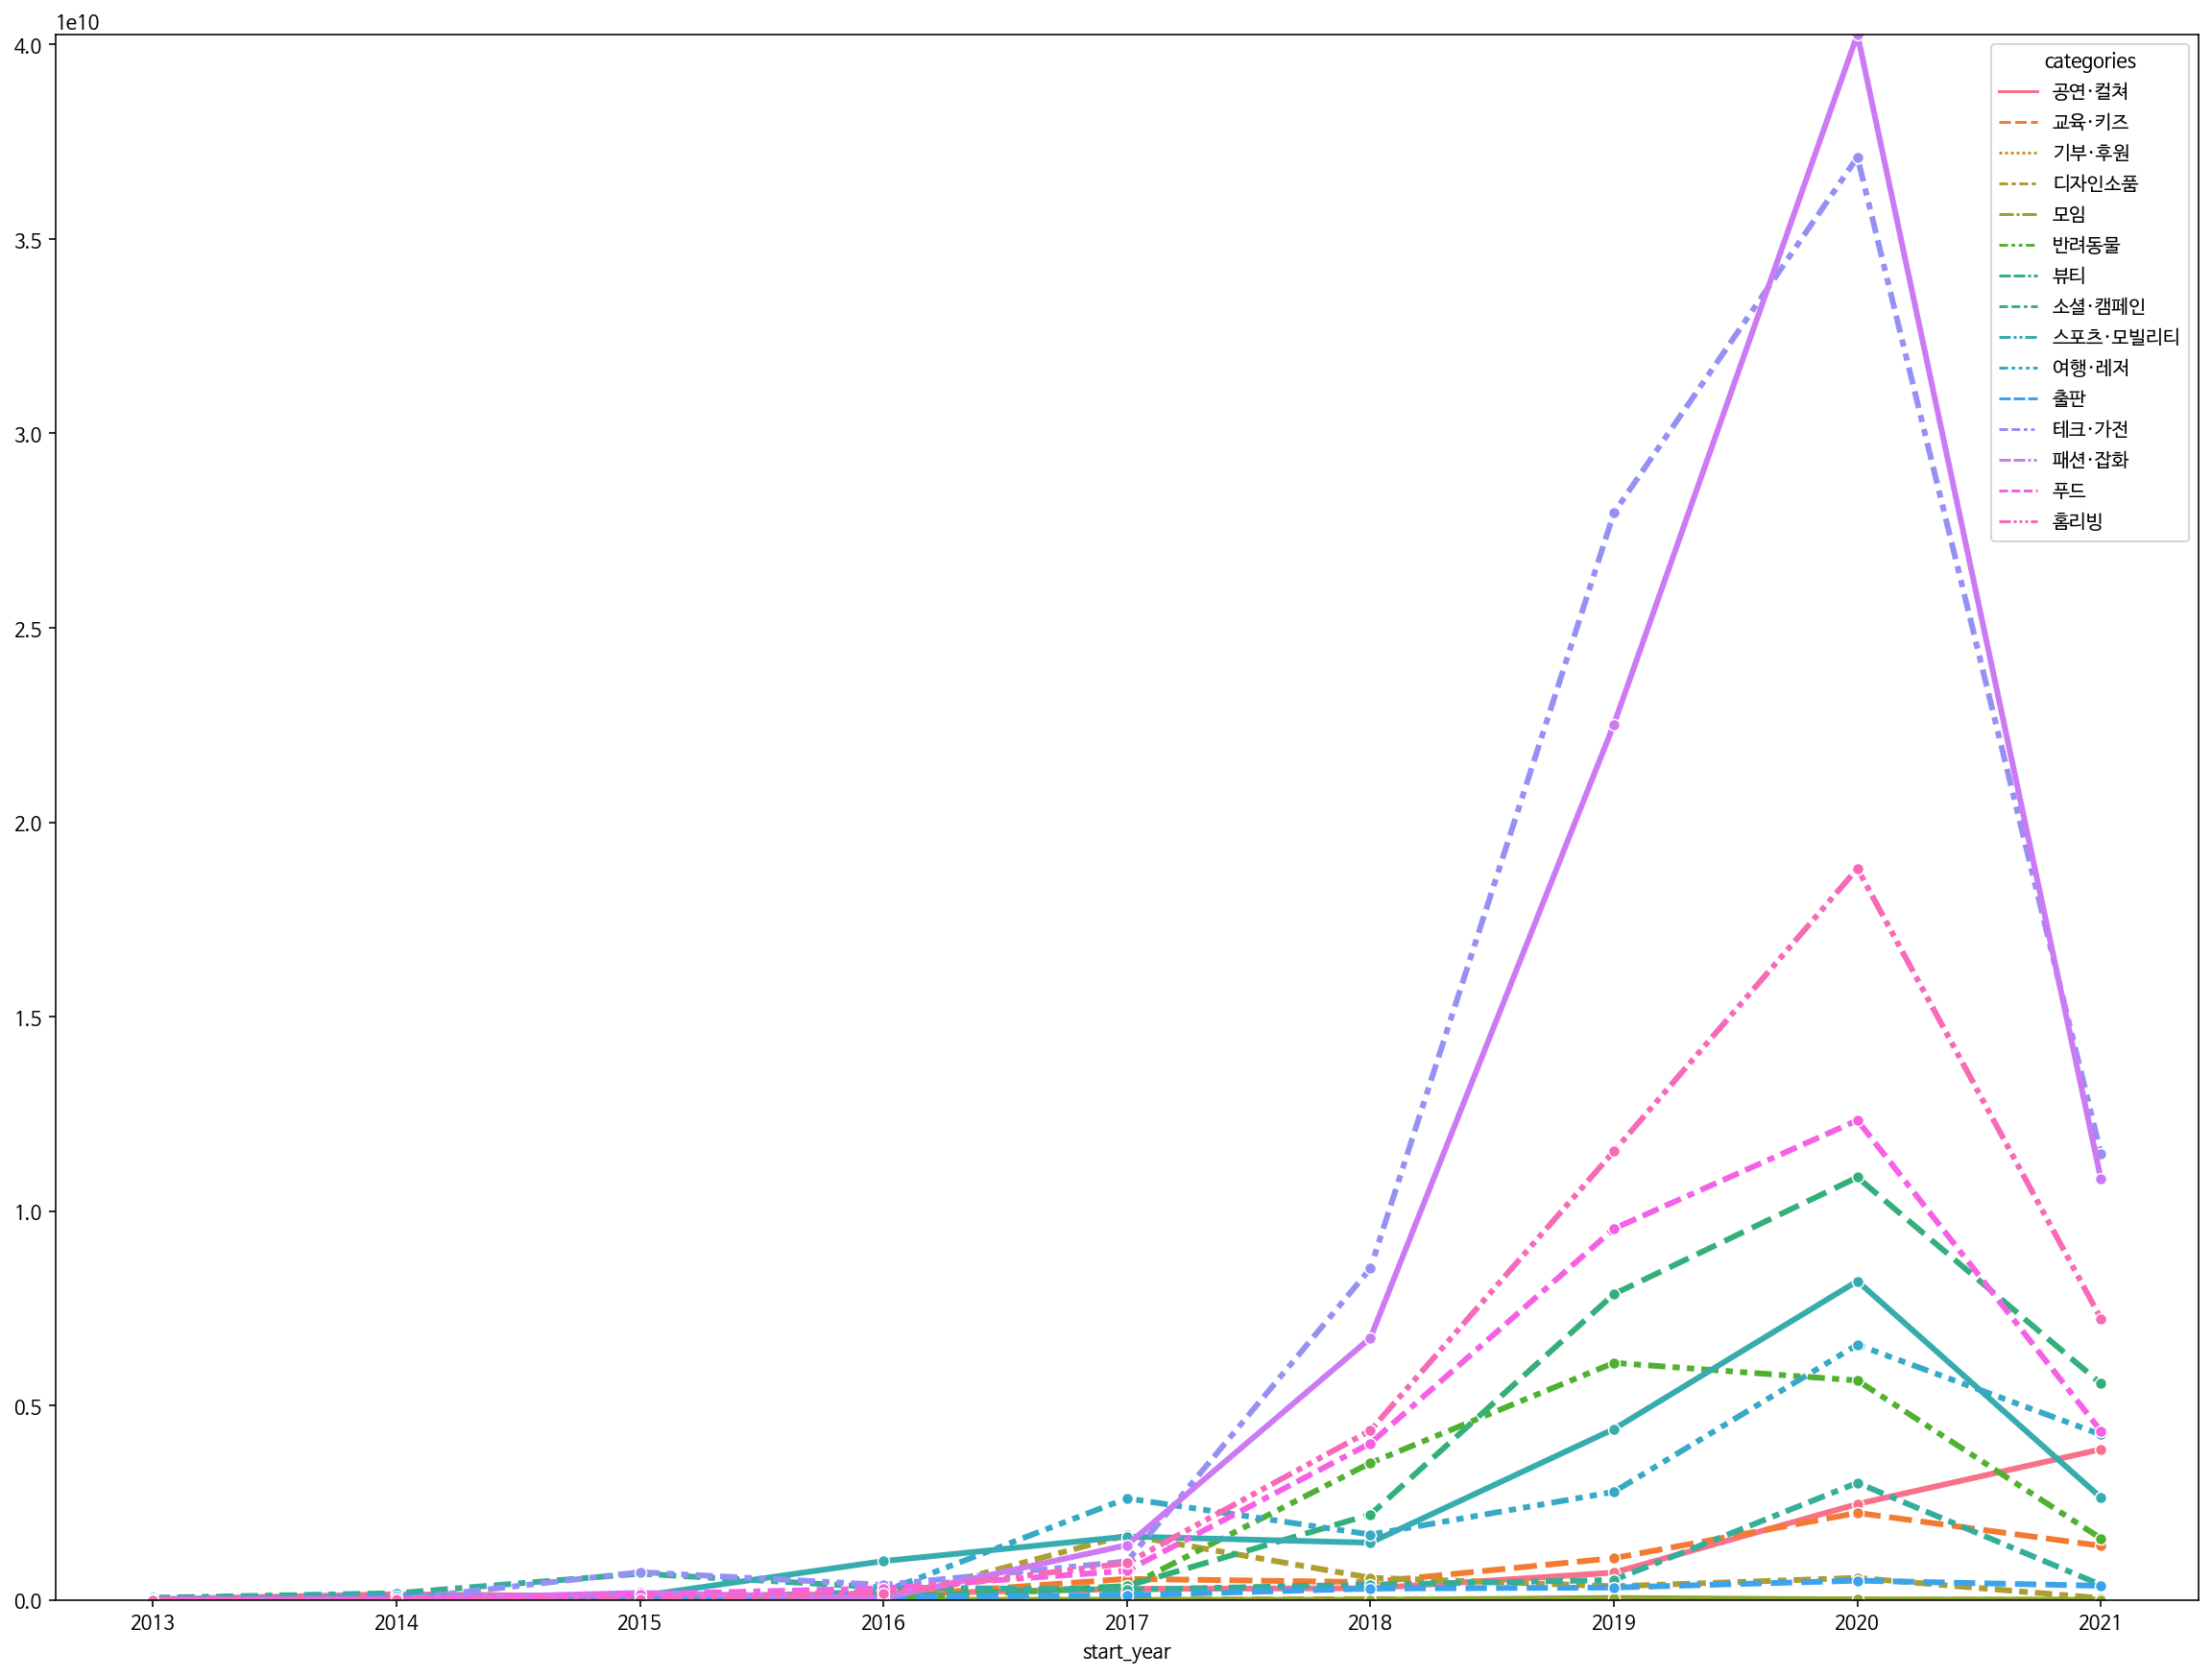

In [17]:
plt.figure(figsize=(20,15))
sns_plot = sns.lineplot(data=df_year_cate,linewidth = 3, marker='o')
sns_plot.set(ylim=(0,40262494587))
sns_plot.lines[0].set_linestyle('-')
sns_plot.lines[2].set_linestyle('--')
sns_plot.lines[4].set_linestyle('-')
sns_plot.lines[6].set_linestyle('--')
sns_plot.lines[8].set_linestyle('-')
sns_plot.lines[10].set_linestyle('--')
sns_plot.lines[12].set_linestyle('-')
plt.show()

##### 4.패션잡화 분석

###### -패션잡화 df

In [19]:
df_fashion = df_origin[df_origin['categories'] ==  '패션·잡화']

###### -2020년도 회사별 총 펀딩액수 총합 top 15

In [20]:
df_fashion[df_fashion['start_year']=='2020'][['title','company_names','funding_amounts']].sort_values(by='funding_amounts',ascending=False)[:15]

,title,company_names,funding_amounts
13747,[마지막 앵콜] 10만원 초반에 누리는 이탈리아 명품 스니커즈의 완벽함,제누이오(주),1839845211
12671,[1.8억 앵콜] 써 본 마스크 중 최고네요. 성능도 착용감도 저세상급,아이돈케어 디자인 스튜디오,667821900
12673,[국민코트]10만원 중반에 만나는 더 진화된 구스 캐시미어 핸드메이드코트,플랫화이트,423441000
12687,11년을 입을 수 있는 11색 무지티,주식회사 노뮤직노라이프,265039400
13043,시뮬럿다이아 5캐럿세트ㅣ3120시간 끝에 탄생한 왕족의 보석을 선물하세요,코스모인터내셔널,227585000
12674,문의쇄도로 8년만에 극적 재출시! ㅣ셀럽 유튜버도 극찬한 클래식 미니백,주)나인식스원,211503590
12691,에르메스출신 디자이너가 만든 10만원대 초반 구스다운 베스트+울코트,(주) 히든메이커스,205487000
12675,[실속패딩] 백화점 바이어 출신이 제작한 10만원대 프리미엄 구스코트,(주)씨앤씨인터내셔널,203743000
12692,[2.5억] 생활한복 살까말까 했던 5가지 고민타파! 한복원피스[일랑],(주)리슬,196900000
12889,5만원대에 만나는 천연소가죽 7colors 브리프케이스 | 앤트레스,앤트레스,195083800


###### -2020년도 데이터 추출

In [22]:
fashion_2020 = df_fashion[df_fashion['start_year']=='2020']

In [23]:
df_fashion_2020 = pd.DataFrame(fashion_2020[ ['company_names','funding_amounts']].groupby(by = ['company_names']).sum()).sort_values(by='funding_amounts', ascending=False)
df_fashion_2020

,funding_amounts
company_names,
제누이오(주),1839845211
플랫화이트,831677000
아이돈케어 디자인 스튜디오,667821900
앤트레스,522688820
주식회사포스팀,430248879
...,...
비비올라,917440
글래스유,914500
홀리트리니티,900500


In [24]:
#총 펀딩액수가 3억 이상인 회사
df_fashion_2020[df_fashion_2020['funding_amounts']> 300000000 ]

,funding_amounts
company_names,
제누이오(주),1839845211
플랫화이트,831677000
아이돈케어 디자인 스튜디오,667821900
앤트레스,522688820
주식회사포스팀,430248879
주식회사 노뮤직노라이프,426482700
로얄금속공업(주),404717825
(주)리슬,330394000
벌브,324076100


###### -시각화

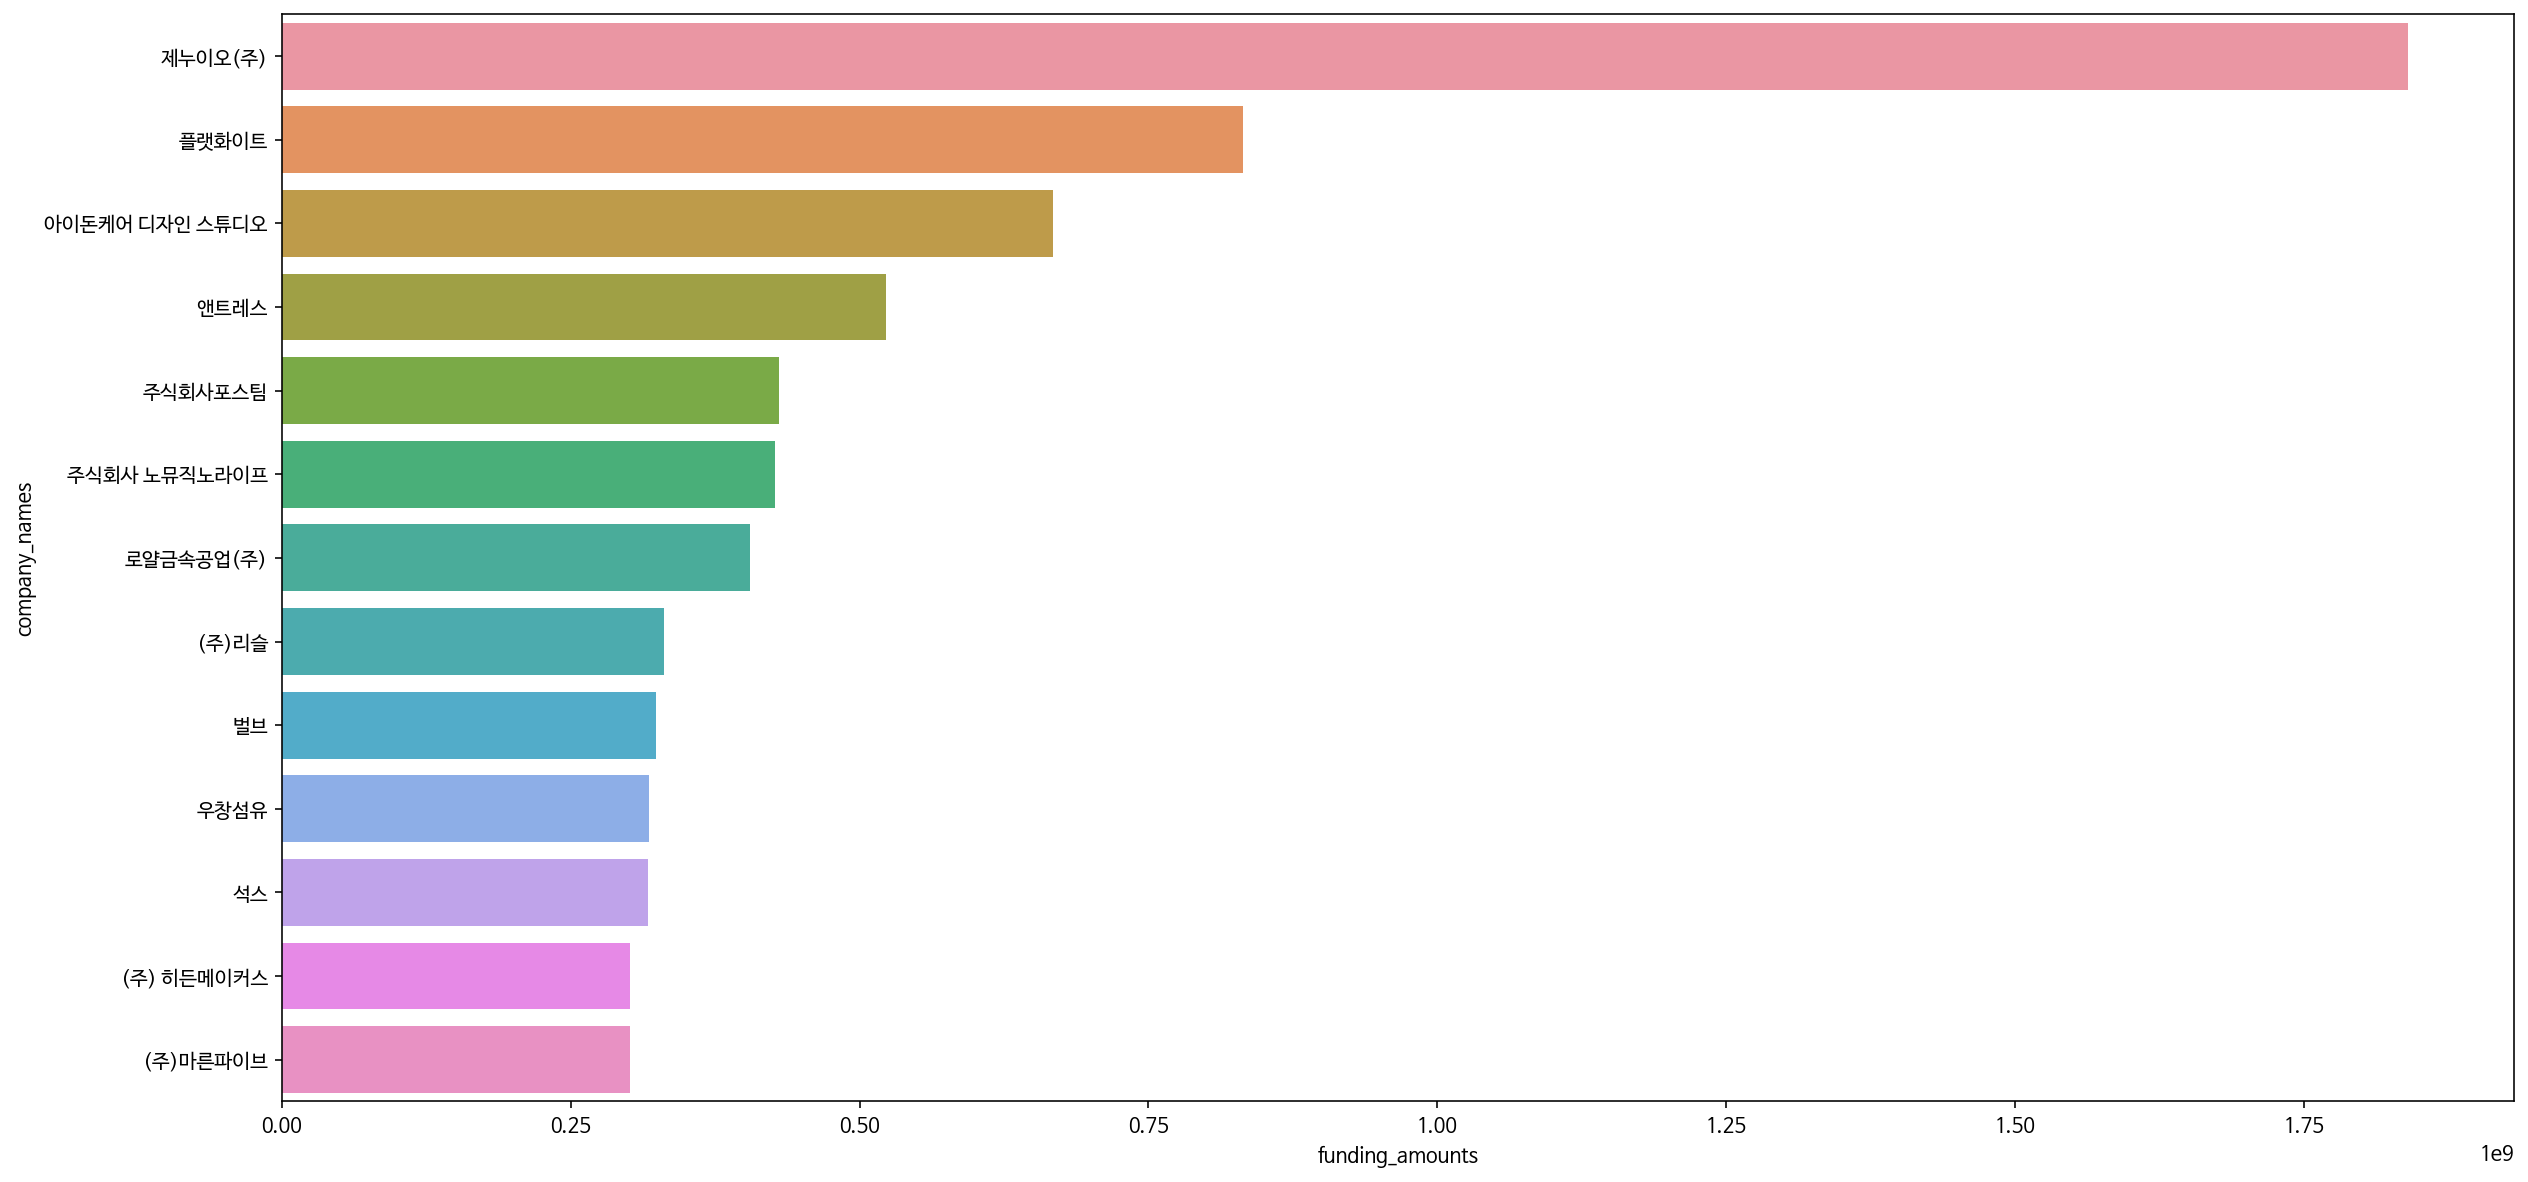

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(y =df_fashion_2020[df_fashion_2020['funding_amounts']> 300000000 ].index ,x='funding_amounts',data=df_fashion_2020[df_fashion_2020['funding_amounts']> 300000000 ])

###### - 13개 회사의 모든 타이틀 분석

In [26]:
#타이틀 추출
company = ['제누이오(주)', '플랫화이트', '아이돈케어 디자인 스튜디오', '앤트레스', '주식회사포스팀', '주식회사 노뮤직노라이프',
       '로얄금속공업(주)', '(주)리슬', '벌브', '우창섬유', '석스', '(주) 히든메이커스', '(주)마른파이브']
titles = []
for i in company:
  if [fashion_2020['company_names'] == i]:
    titles.append(fashion_2020[fashion_2020['company_names'] == i]['title'].values)

In [32]:
titles

[array(['[마지막 앵콜] 10만원 초반에 누리는 이탈리아 명품 스니커즈의 완벽함'], dtype=object),
 array(['[국민코트]10만원 중반에 만나는 더 진화된 구스 캐시미어 핸드메이드코트',
        '[국민니트]캐시미어 10% 황금비율, 매일 입기 좋은 니트가 3만원 대!',
        '[마지막앵콜] 티셔츠보다 시원하다!? 세탁 편한  <냉감 얼음니트>',
        '[앵콜] 아직도 기장 수선을? 대한민국 남자를 위한 골라입는 맞춤 팬츠',
        '[가장 진화된 티셔츠] 완벽한 여름을 위한 #1만원대 쿨텐션, 차려입은티',
        '[4억앵콜]10만원 중반 국민코트, 진화된 구스 캐시미어 핸드메이드 코트',
        '극강의 시원함과 편안함! 땡볕의 그늘막이 되어줄  [그늘막 셋업]',
        '2만원 초반에 누리는 최고급 퀄리티 셔츠[시원함, 편안함, 뽀송함]',
        '[만점 앵콜] 리얼보다 좋다고? 서포터가 인정한 프리미엄 스웨이드자켓',
        '[후기인증 앵콜] 린넨을 뛰어넘다! 쿨맥스 자켓&팬츠 10만원 초반!',
        '한 번 입으면 다른 셔츠는 못 입는다?! 진짜 편한 [프리덤셔츠]',
        '[마지막 앵콜] 가장 진화된 티셔츠 #1만원대 쿨텐션, 차려입은 티셔츠',
        "가을에 뭐입지? 6만원대 '고' 퀄리티 '체크'면 다된다!",
        "[요청앵콜] 다림질, 답답함에서 구원할 '프리덤셔츠'"], dtype=object),
 array([' [1.8억 앵콜] 써 본 마스크 중 최고네요. 성능도 착용감도 저세상급'], dtype=object),
 array(['[앵콜]5만원대에 만나는 천연소가죽 8colors 브리프케이스, 앤트레스',
        '5만원대에 만나는 천연소가죽 7colors 브리프케이스 | 앤트레스',
        '8COLOR | 천연소가죽 사첼백이 7만원대? 명품의 새 기준, 앤트레스',
       

###### - 형태소 분석



In [27]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
     |████████████████████████████████| 460kB 45.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [28]:
from konlpy.tag import Kkma,Hannanum

In [34]:
nouns = []
hannanum = Hannanum()
for i in titles:
  for j in i:
    noun = hannanum.nouns(j)
    nouns.append(noun)

In [35]:
nouns

[['마지막', '앵콜', '10만원', '초반', '이탈리아', '명품', '스니커즈', '완벽함'],
 ['국민코트', '10만원', '중반', '진화', '구스', '캐시미', '핸드메이드코트'],
 ['[국민니트]캐시미', '10', '황금비율', '니트', '3만원', '대'],
 ['마지막앵콜', '티셔츠', '시원', '세탁', '<냉감', '얼음니트'],
 ['앵콜', '기장', '수선', '대한민국', '남자', '팬츠'],
 ['진화', '티셔츠', '완벽', '여름', '#1만원대', '쿨텐션,', '차려입은티'],
 ['[4억앵콜]10만원', '중반', '국민코트', '진화', '구스', '캐시미', '핸드메이드', '코트'],
 ['극강', '시원함', '편안', '땡볕', '그늘막', '그늘막', '셋업'],
 ['2만원', '초반', '최고급', '퀄리티', '셔츠[시원함,', '편안', '뽀송함'],
 ['만점', '앵콜', '리얼', '서포터', '인정', '프리미엄', '스웨이드자켓'],
 ['후기인증', '앵콜', '린넨', '쿨맥스', '자켓&팬츠', '10만원', '초반'],
 ['번', '셔츠', '진짜', '프리덤셔츠'],
 ['마지막', '앵콜', '진화', '티셔츠', '#1만원대', '쿨텐션,', '차려입', '티셔츠'],
 ['가을', '뭐입지', '6만원', '퀄리티', '체크', '면'],
 ['요청앵콜', '다림질', '답답', '구원', '프리덤셔츠'],
 ['1.8억', '앵콜', '마스크', '중', '최고', '성능', '착용감', '저세상급'],
 ['앵콜', '5만원', '천연소가죽', '8colors', '브리프케이스', '앤트레스'],
 ['5만원', '천연소가죽', '7colors', '브리프케이스', '|', '앤트레스'],
 ['8COLOR', '|', '천연소가죽', '사첼백', '7만원', '명품', '기준', '앤트레스'],
 ['4억', '8컬러,', '3사이즈]', '5만원', 

In [36]:
#한 리스트로 합치기
total = nouns[0]
for i in nouns[1:]:
  for j in i:
    total.append(j)
len(total)

544

In [39]:
total

['마지막',
 '앵콜',
 '10만원',
 '초반',
 '이탈리아',
 '명품',
 '스니커즈',
 '완벽함',
 '국민코트',
 '10만원',
 '중반',
 '진화',
 '구스',
 '캐시미',
 '핸드메이드코트',
 '[국민니트]캐시미',
 '10',
 '황금비율',
 '니트',
 '3만원',
 '대',
 '마지막앵콜',
 '티셔츠',
 '시원',
 '세탁',
 '<냉감',
 '얼음니트',
 '앵콜',
 '기장',
 '수선',
 '대한민국',
 '남자',
 '팬츠',
 '진화',
 '티셔츠',
 '완벽',
 '여름',
 '#1만원대',
 '쿨텐션,',
 '차려입은티',
 '[4억앵콜]10만원',
 '중반',
 '국민코트',
 '진화',
 '구스',
 '캐시미',
 '핸드메이드',
 '코트',
 '극강',
 '시원함',
 '편안',
 '땡볕',
 '그늘막',
 '그늘막',
 '셋업',
 '2만원',
 '초반',
 '최고급',
 '퀄리티',
 '셔츠[시원함,',
 '편안',
 '뽀송함',
 '만점',
 '앵콜',
 '리얼',
 '서포터',
 '인정',
 '프리미엄',
 '스웨이드자켓',
 '후기인증',
 '앵콜',
 '린넨',
 '쿨맥스',
 '자켓&팬츠',
 '10만원',
 '초반',
 '번',
 '셔츠',
 '진짜',
 '프리덤셔츠',
 '마지막',
 '앵콜',
 '진화',
 '티셔츠',
 '#1만원대',
 '쿨텐션,',
 '차려입',
 '티셔츠',
 '가을',
 '뭐입지',
 '6만원',
 '퀄리티',
 '체크',
 '면',
 '요청앵콜',
 '다림질',
 '답답',
 '구원',
 '프리덤셔츠',
 '1.8억',
 '앵콜',
 '마스크',
 '중',
 '최고',
 '성능',
 '착용감',
 '저세상급',
 '앵콜',
 '5만원',
 '천연소가죽',
 '8colors',
 '브리프케이스',
 '앤트레스',
 '5만원',
 '천연소가죽',
 '7colors',
 '브리프케이스',
 '|',
 '앤트레스',
 '8COLOR',
 '|',
 '천연소가죽',
 

In [40]:
total_set = list(set(total))
len(total_set)

335

In [41]:
count = {}
for i in total_set:
  count[i] = total.count(i)

In [44]:
count_top = []
for i in count:
  if count[i] >= 8:
    count_top.append([i,count[i]])

In [45]:
df_count_top = pd.DataFrame(count_top)
df_count_top.sort_values(by=1, ascending=False)

,0,1
1,앵콜,28
0,셔츠,13


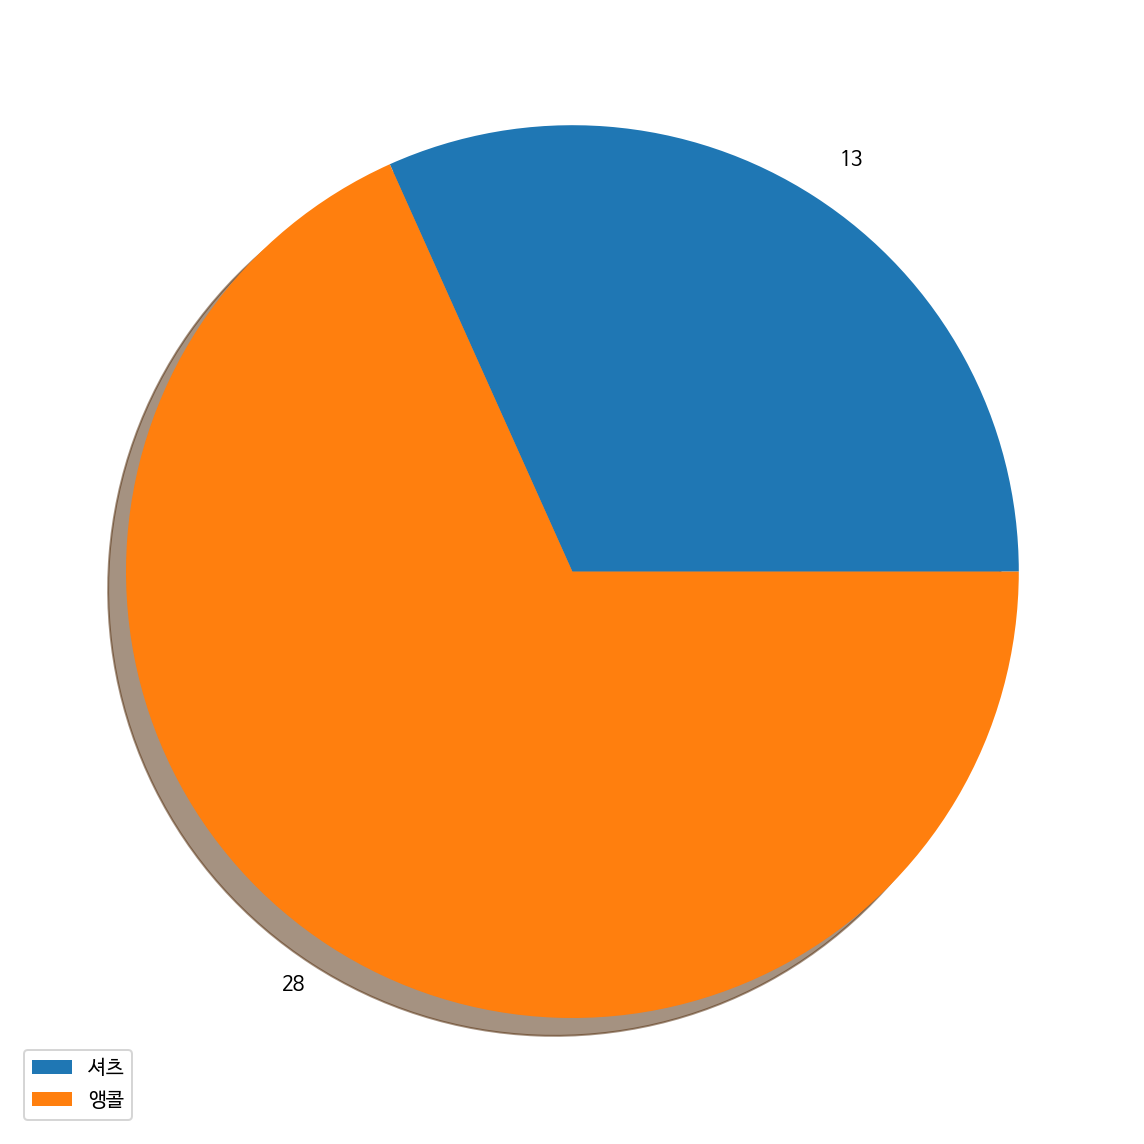

In [46]:
labels = df_count_top[0]
plt.figure(figsize=(10, 12))
plt.pie(df_count_top[1], labels=df_count_top[1],shadow=True)
plt.legend(labels,loc=3)
plt.show()

